In [29]:
import sklearn
import numpy as np
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from prettytable import PrettyTable
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_notebook
tqdm_notebook.get_lock().locks = []
# !pip install sweetviz
# import sweetviz as sv
import concurrent.futures
import copy
from copy import deepcopy       
from functools import partial
from itertools import combinations
import random
from random import randint, uniform
import gc
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler,PowerTransformer, FunctionTransformer
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from itertools import combinations
from sklearn.impute import SimpleImputer
import xgboost as xg
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,mean_squared_log_error, roc_auc_score, accuracy_score, f1_score, precision_recall_curve, log_loss
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from gap_statistic.optimalK import OptimalK
from scipy import stats
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import boxcox
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
import optuna
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder, CatBoostEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier,ExtraTreesClassifier, AdaBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from catboost import Pool
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from autogluon.tabular import TabularPredictor


import joblib 

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns',None)

In [30]:
sub1 = pd.read_csv("submission_hill_climb_v2.csv")
sub2 = pd.read_csv("submission_DNN_v7_batchnorm_leaky_0.80_0.781.csv")
sub3 = pd.read_csv("0.79_hillclimb_O.csv")

In [31]:
threshold1 = 0.1
threshold2 = 0.2
threshold3 = 0.3
threshold4 = 0.4
threshold5 = 0.5
threshold6 = 0.6
threshold7 = 0.7
threshold8 = 0.8
threshold9 = 0.9


for sub in [sub1,sub2,sub3]:
    sub['Class'] = 0
    sub.loc[sub['defects'] <= threshold1, 'Class'] = 0
    sub.loc[(sub['defects'] > threshold1) & (sub['defects'] <= threshold2), 'Class'] = 1
    sub.loc[(sub['defects'] > threshold2) & (sub['defects'] <= threshold3), 'Class'] = 2
    sub.loc[(sub['defects'] > threshold3) & (sub['defects'] <= threshold4), 'Class'] = 3
    sub.loc[(sub['defects'] > threshold4) & (sub['defects'] <= threshold5), 'Class'] = 4
    sub.loc[(sub['defects'] > threshold5) & (sub['defects'] <= threshold6), 'Class'] = 5
    sub.loc[(sub['defects'] > threshold6) & (sub['defects'] <= threshold7), 'Class'] = 6
    sub.loc[(sub['defects'] > threshold7) & (sub['defects'] <= threshold8), 'Class'] = 7
    sub.loc[(sub['defects'] > threshold8) & (sub['defects'] <= threshold9), 'Class'] = 8
    sub.loc[sub['defects'] > threshold9, 'Class'] = 9
    sub.drop(columns=['defects'], inplace=True)

In [32]:
concatenated_df = pd.concat([ sub1["Class"], sub2["Class"],sub3['Class']], axis=1)
same_categories = concatenated_df.apply(lambda row: row.nunique() == 1, axis=1)
df_same_categories = concatenated_df[same_categories]
df_same_categories

,Class,Class,Class
2,6,6,6
9,0,0,0
12,1,1,1
13,5,5,5
16,7,7,7
...,...,...,...
67832,0,0,0
67833,0,0,0
67834,0,0,0
67836,0,0,0


In [33]:
different_categories=concatenated_df.apply(lambda row: row.nunique()> 1, axis=1)
df_different_categories = concatenated_df[different_categories]
df_different_categories

,Class,Class,Class
0,1,3,2
1,1,2,2
3,4,5,4
4,0,1,1
5,4,5,5
...,...,...,...
67835,2,2,3
67837,2,0,2
67838,0,1,1
67840,0,0,1


In [34]:
all_different_categories=concatenated_df.apply(lambda row: row.nunique()> 2, axis=1)
df_all_different_categories= concatenated_df[all_different_categories]
df_all_different_categories

,Class,Class,Class
0,1,3,2
43,2,1,3
60,0,2,1
75,2,4,3
128,3,2,4
...,...,...,...
67708,1,0,2
67731,2,5,3
67746,1,0,2
67812,1,0,2


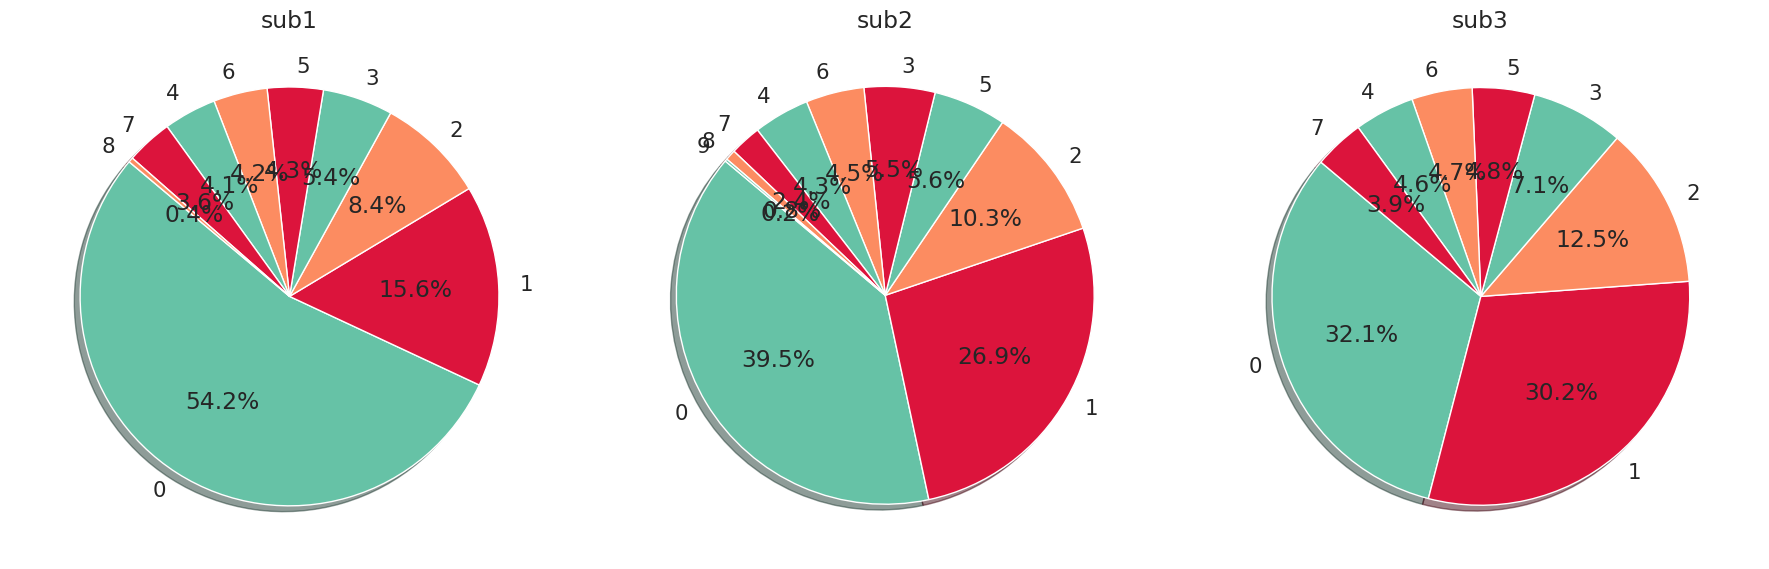

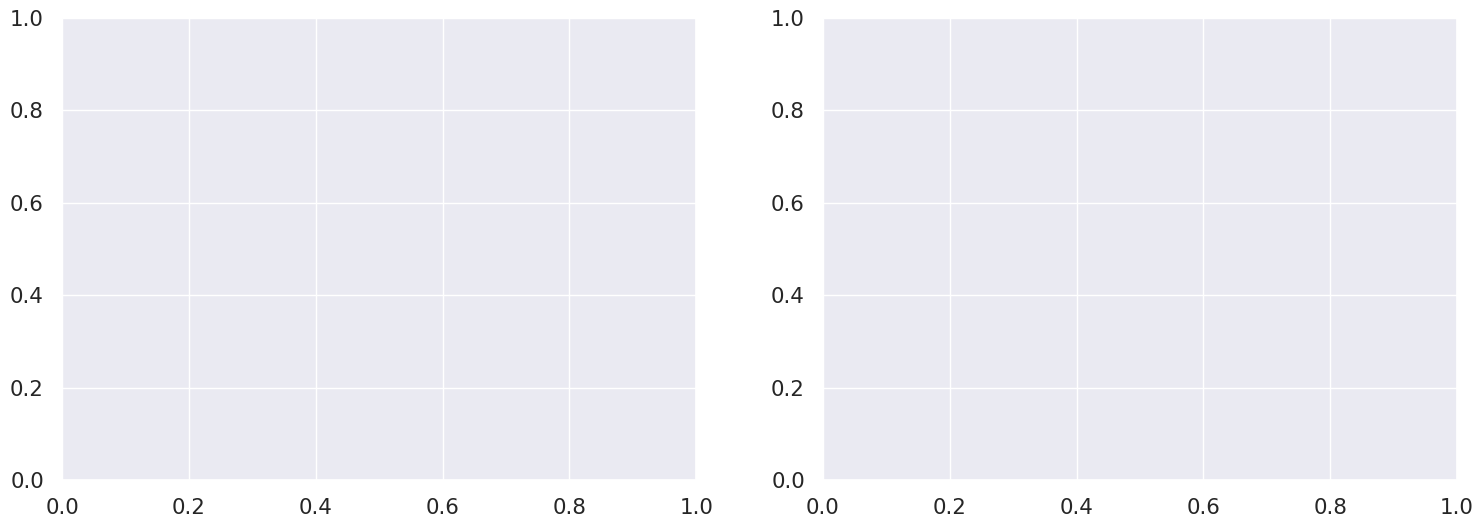

In [35]:
def plot_pie_chart(data, title, ax):
    data_counts = data['Class'].value_counts()
    labels = data_counts.index
    sizes = data_counts.values
    colors = [ (0.4, 0.76, 0.65), 'crimson',  (0.99, 0.55, 0.38)]  
    #explode = (0.1, 0, 0)  

    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    ax.axis('equal') 
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Create three subplots in a row

plot_pie_chart(sub1, "sub1", axes[0])
plot_pie_chart(sub2, "sub2", axes[1])
plot_pie_chart(sub3, "sub3", axes[2])


plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Create three subplots in a row

In [36]:
train = pd.read_csv("train_cleaned.csv")
test = pd.read_csv("test_cleaned.csv")

In [19]:
final_features=[f for f in train.columns if f not in ['defects']]
final_features=[*set(final_features)]

X_train = train[final_features]
y_train = train['defects']
X_test = test[final_features]

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

X_train_cop = X_train.copy()
X_test_cop = X_test.copy()

def closest_index(X_test_cop, X_train_cop, index_test, num_closest=1000):
    res = [] 
    for i in index_test:
        test_point = np.array(X_test_cop.loc[i]).reshape(1, -1)  
        similarities = cosine_similarity(X_train_cop, test_point)  
        closest_indices = np.argsort(similarities[:, 0])[-num_closest:][::-1] 
        res.append(closest_indices)  
    return np.array(res)

In [21]:
res = closest_index(X_test_cop, X_train_cop, df_all_different_categories.index.tolist())
res=res.reshape(1,-1)[0]
#print("Closest indexes in X_train:", res)

In [22]:
res=[*set(res)]
print(f"Among {X_train.shape[0]} data points in the train, we have identified {len(res)} , it also means some of them got eliminated")

Among 101763 data points in the train, we have identified 76273 , it also means some of them got eliminated


In [23]:
X_train=X_train.loc[res]
y_train=y_train.loc[res]

X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

In [24]:
X = pd.concat([X_train,y_train],axis=1)

In [25]:
automl = TabularPredictor(problem_type='binary', label='defects', eval_metric='roc_auc')
automl.fit(X, presets='best_quality', num_stack_levels=1, num_bag_folds=5, num_bag_sets=1)

automl.leaderboard(silent=True)

No path specified. Models will be saved in: "AutogluonModels/ag-20231023_124016/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=5, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231023_124016/"
AutoGluon Version:  0.8.2
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #179-Ubuntu SMP Mon Aug 14 08:51:31 UTC 2023
Disk Space Avail:   43.89 GB / 199.67 GB (22.0%)
Train Data Rows:    76273
Train Data Columns: 27
Label Column: defects
Preprocessing data ...
Selected class <--> label mapping:  class 1 = True, class 0 = False
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    49664.33 MB
	Train Data (Original)  Memory Usage: 16.48 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to ma

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.800346,414.214639,6092.129086,0.005903,6.398403,3,True,26
1,WeightedEnsemble_L2,0.798775,68.418185,5033.772706,0.006091,7.648201,2,True,14
2,CatBoost_BAG_L2,0.798304,397.738107,5177.322807,0.056257,24.096769,2,True,19
3,NeuralNetFastAI_BAG_L2,0.798222,401.697391,5687.749699,4.015541,534.523661,2,True,22
4,LightGBMXT_BAG_L2,0.798171,398.459964,5163.727958,0.778115,10.501920,2,True,15
5,CatBoost_BAG_L1,0.797505,0.274584,151.507826,0.274584,151.507826,1,True,7
6,LightGBM_BAG_L1,0.797488,1.282951,222.798640,1.282951,222.798640,1,True,4
7,LightGBM_BAG_L2,0.797424,398.693784,5165.759757,1.011934,12.533719,2,True,16
8,LightGBMXT_BAG_L1,0.797385,2.997037,79.518665,2.997037,79.518665,1,True,3
9,NeuralNetTorch_BAG_L2,0.796823,402.644770,5448.882671,4.962920,295.656633,2,True,24


In [26]:
predictions = automl.predict_proba(test)
predictions

,False,True
0,0.766193,0.233807
1,0.771398,0.228602
2,0.399414,0.600586
3,0.567836,0.432164
4,0.865330,0.134670
...,...,...
67837,0.765971,0.234029
67838,0.891913,0.108087
67839,0.804439,0.195561
67840,0.897134,0.102866


In [28]:
sample_submission = pd.read_csv('../SW_defect/sample_submission.csv')

submission = pd.DataFrame({
    'id': sample_submission['id'],
    'defects': predictions.values[:, 1]
})

submission.to_csv('letsgo.csv',index=False)